Question 01. Find the spectrum of the following signal using FFT algorithm:

f = 0.25 + 2sin(2pi * 5k) + sin(2pi * 12.5k) + 1.5sin(2pi * 20k) + 0.5sin(2pi * 35k)

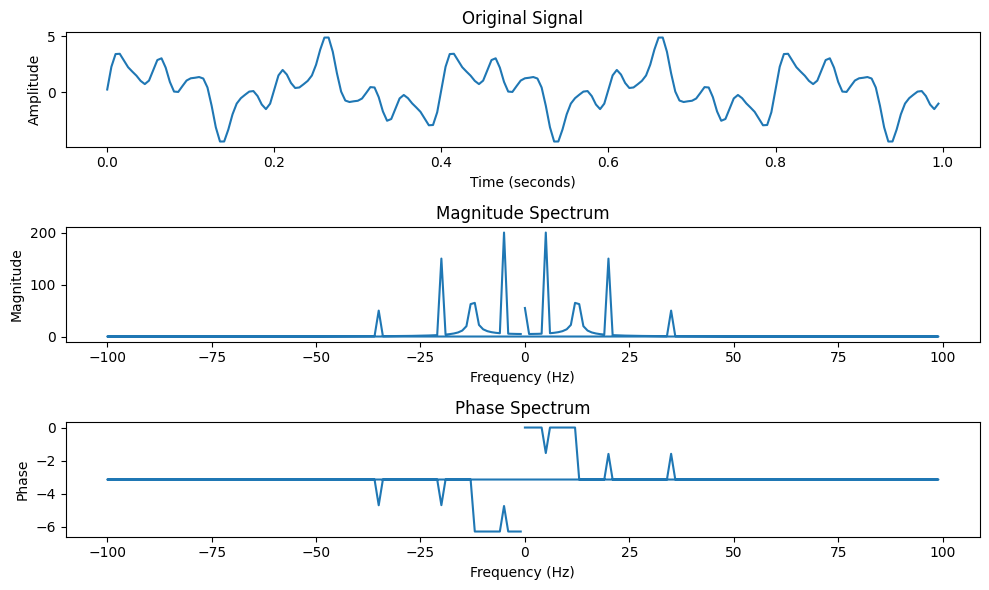

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fs = 200
k = np.arange(0, 1, 1/fs)

f = 0.25 + 2*np.sin(2*np.pi*5*k) + np.sin(2*np.pi*12.5*k) + 1.5*np.sin(2*np.pi*20*k) + 0.5*np.sin(2*np.pi*35*k)
w = np.fft.fftfreq(len(f), d=1/fs)
F = np.fft.fft(f)

plt.figure(figsize=(10, 6))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(k, f)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(F))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

# Phase Spectrum
plt.subplot(3, 1, 3)
plt.plot(w, np.unwrap(np.angle(F)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

plt.tight_layout()
plt.show()


2 .write a program for sampling and reconstructon of signal

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16  5.87785252e-01
  9.51056516e-01  9.51056516e-01  5.87785252e-01  3.67394040e-16
 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
 -4.89858720e-16  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  6.12323400e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -7.

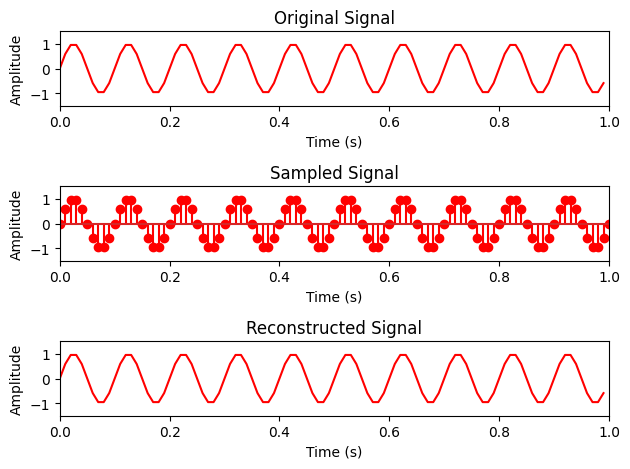

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the signal
f = 10  # Frequency of the sinusoid (in Hz)
fs = 100 # Sampling rate (in Hz)
t = np.arange(0, 1, 1/fs)  # Time vector an array size 0 to 1,0 .01 0.02 ...0.99
print(t)
x = np.sin(2*np.pi*f*t)  # Generate the sinusoidal signal
print(x)
# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(t, x,'r')
plt.ylim(-1.5,1.5) 
plt.xlim(0,1) 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Sample the signal
Ts = 1/fs  # Sampling interval (in seconds)
n = np.arange(0, 1+Ts, Ts)  # Sampling instants
print(n)
xn = np.sin(2*np.pi*f*n)  # Sampled signal

# Plot the sampled signal
plt.subplot(3, 1, 2)
plt.stem(n, xn,'r')
plt.ylim(-1.5,1.5) 
plt.xlim(0,1) 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')

# Reconstruct the analog signal using ideal reconstruction
xr = np.zeros_like(t)  # Initialize the reconstructed signal

for i in range(len(n)):
    xr += xn[i]*np.sinc((t-(i*Ts))/Ts)
    

# Plot the reconstructed signal
print(xr)
plt.subplot(3, 1, 3)
plt.plot(t, xr,'r')
plt.ylim(-1.5,1.5) 
plt.xlim(0,1) 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')
plt.tight_layout()
plt.show()


03.Design a FIR low pass filter to the Design a Lowpass filter to meet the following specifications-Passsband edge = 1.5KHz Transition width = 0.5KHz Fs = 10KHz Filter length =67; use Blackman window in the design.

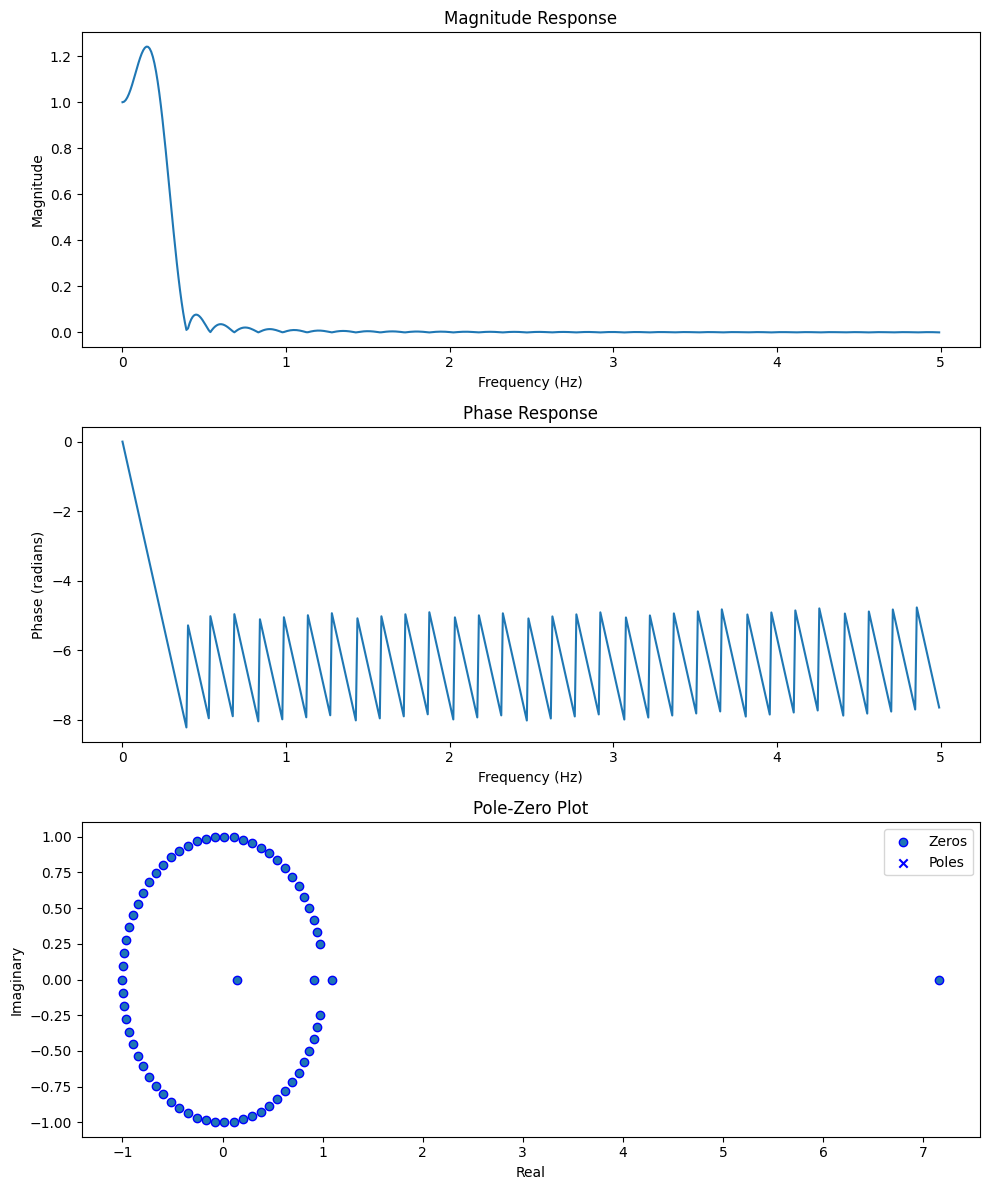

In [12]:

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
passband_edge = 1.5  # kHz
transition_width = .5  # kHz
fs = 10  # kHz
# Calculate filter parameters
nyquist = 0.5 * fs
fc = passband_edge / nyquist #cutoff_frequency
width = transition_width / nyquist
N = 67  # order of filter filter_length = 67
window = 'blackman'  # window function

# Design the filter using the specified parameters
b = sig.firwin(N + 1, fc, fs=fs, window=window, pass_zero='lowpass', width=width )
# Frequency response
w, h_freq = sig.freqz(b, fs=fs)
# Poles and Zeros
z, p, k = sig.tf2zpk(b, 1)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.legend()
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')

plt.tight_layout()
plt.show()



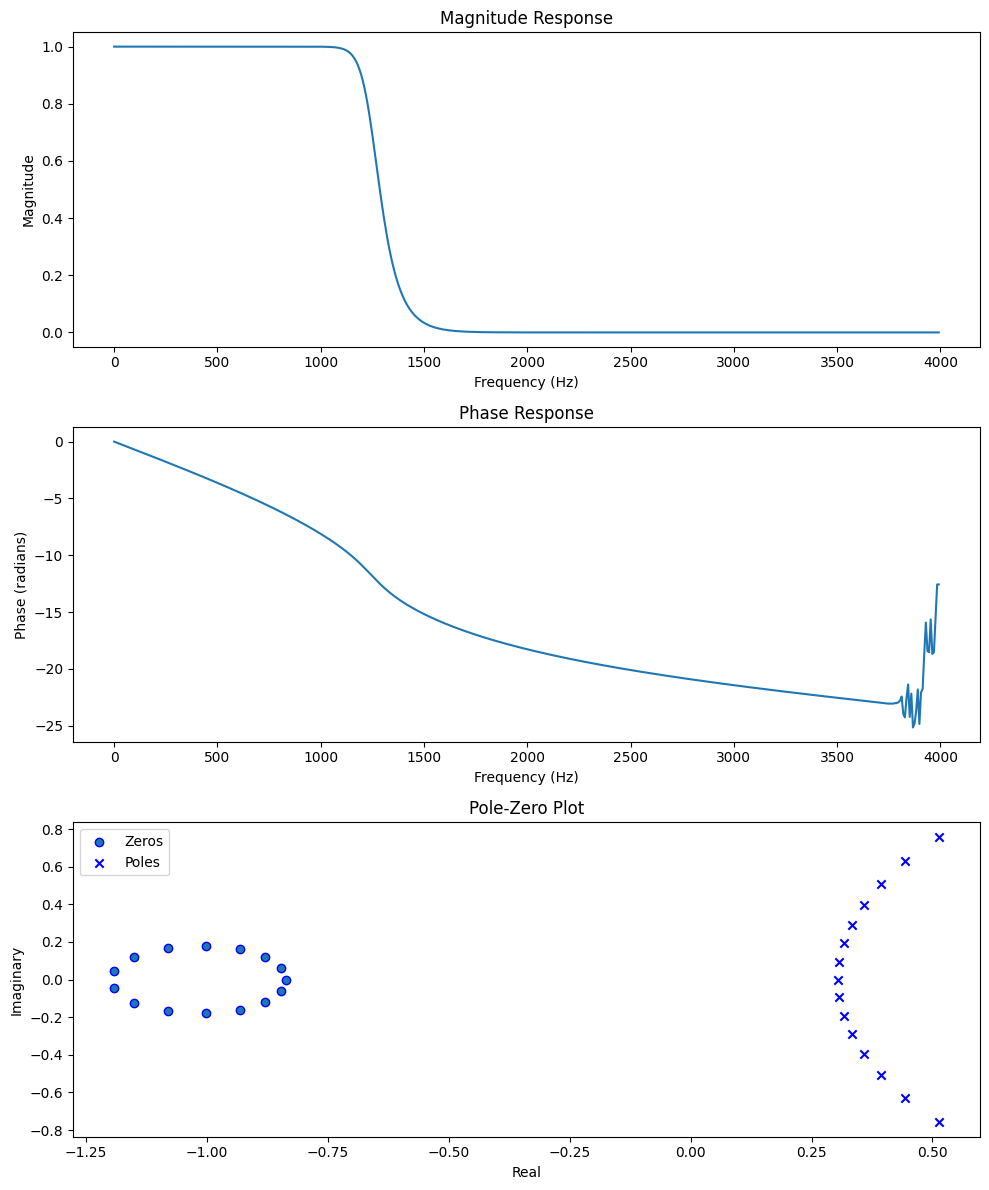

In [13]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
fs = 8000
low_cutoff = 1200
high_cutoff = 1700
ripple = 1  # dB
order, wn = sig.buttord(low_cutoff / (fs / 2), high_cutoff / (fs / 2), ripple, 50)
b, a = sig.butter(order, wn)

# Frequency response
w, h = sig.freqz(b, a, 512, fs=fs)

# Poles and Zeros
z, p, k = sig.tf2zpk(b, a)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

plt.tight_layout()
plt.show()


4. Design an FIR filter to meet the following specifications Passsband edge = 2KHz Stopband edge = 5KHZ Fs = 20KHz Filter length =21, use Hanning window in the design.

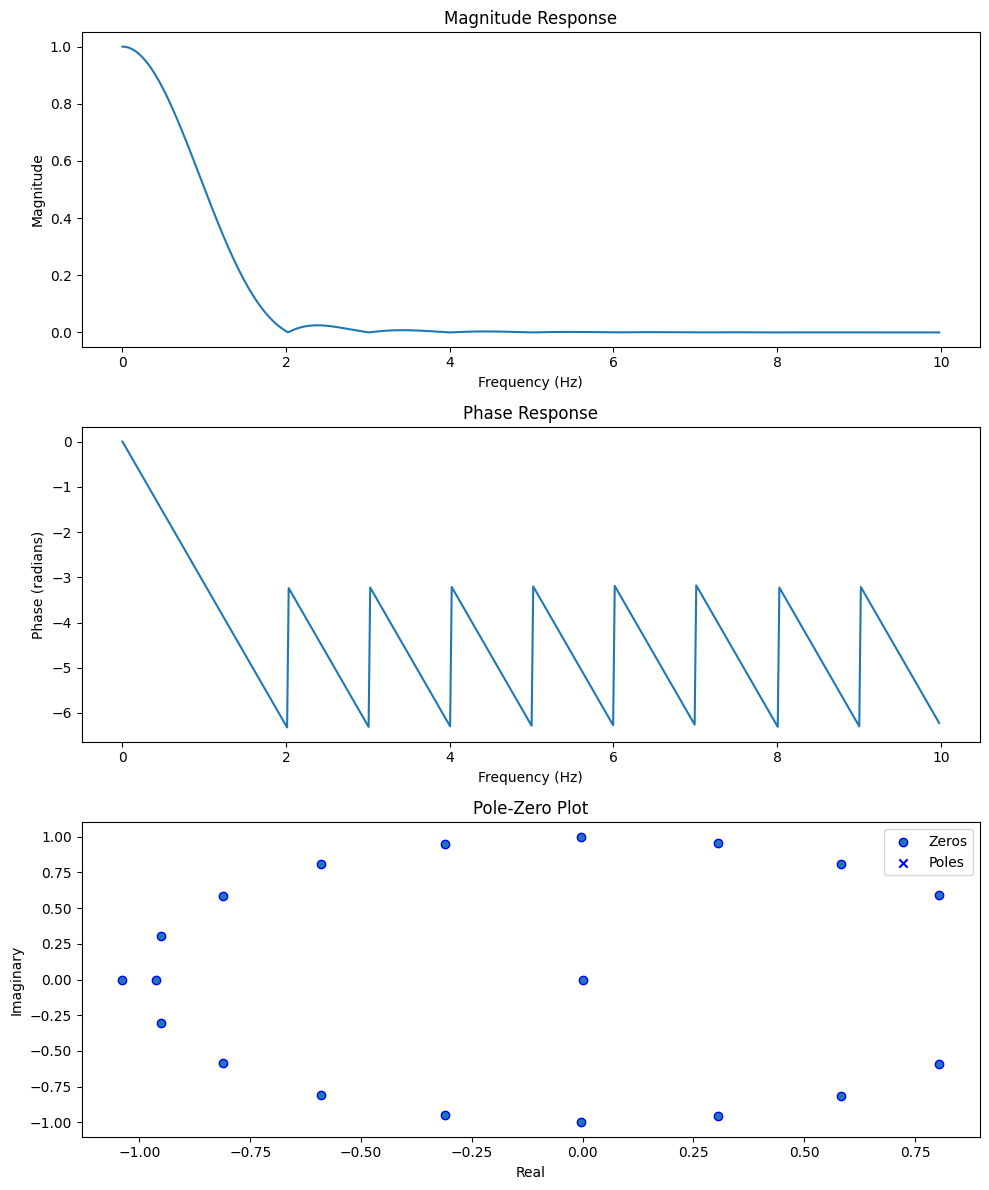

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Filter specifications
passband_edge = 2  # kHz
stopband_edge = 5  # kHz
fs = 20  # kHz
filter_length = 21

# Calculate filter parameters
nyquist = 0.5 * fs
passband_frequency = passband_edge / nyquist
stopband_frequency = stopband_edge / nyquist
cutoff_frequency = passband_edge / nyquist

# Design the low-pass FIR filter using the specified parameters
filter_coefficients = signal.firwin(filter_length, cutoff_frequency, fs=fs, window='hann', pass_zero='lowpass')

# Frequency response
frequencies, magnitude_response = signal.freqz(filter_coefficients, fs=fs)

# Poles and Zeros
zeros, poles, gain = signal.tf2zpk(filter_coefficients, 1)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(frequencies, np.abs(magnitude_response))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.unwrap(np.angle(magnitude_response)))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='b', label='Poles')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

plt.tight_layout()
plt.show()


05.(a)zplane to obtain a pole-zero plot for the following system
 H(z)=(1+z^(-2))/(2+z^(-1)-0.5z^(-2)+0.25z^(-3) )


[-0.+1.j  0.-1.j]
[-0.91964338+0.j          0.20982169+0.30314536j  0.20982169-0.30314536j]


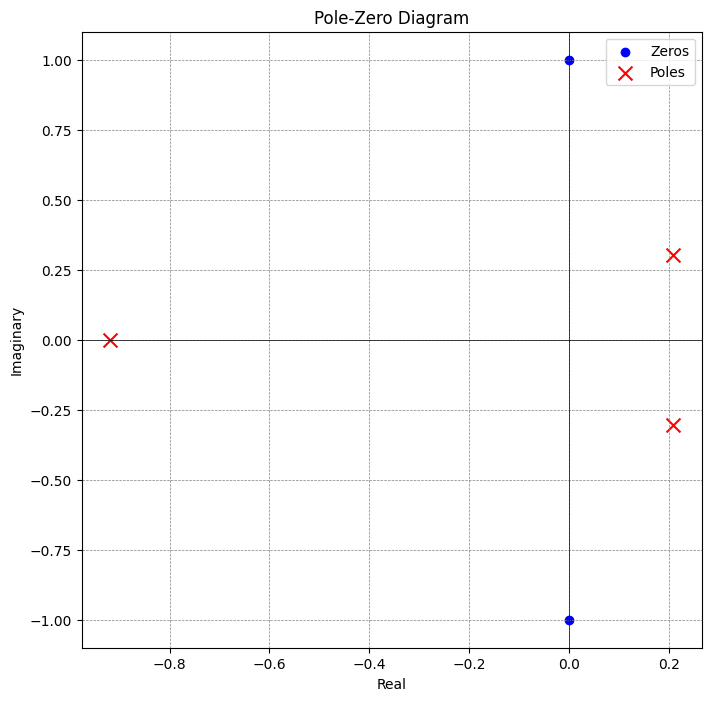

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk

# Coefficients of the numerator and denominator
numerator_coeffs = [1, 0, 1]
denominator_coeffs = [2, 1, -0.5, 0.25]

# Get the zeros, poles, and gain
zeros, poles, gain = tf2zpk(numerator_coeffs, denominator_coeffs)

print(zeros)
print(poles)
# Plot the pole-zero diagram
plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles',s=100)
plt.title('Pole-Zero Diagram')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


5.(b)zplane to obtain a pole-zero plot for the following system
 H(z)=(1+z^(-1)+(3/2) z^(-2)+(1/2)z^(-3))/(1+(3/2) z^(-1)+(1/2)z^(-2) )


[-0.30169587+1.08151258j -0.30169587-1.08151258j -0.39660825+0.j        ]
[-1.  -0.5]


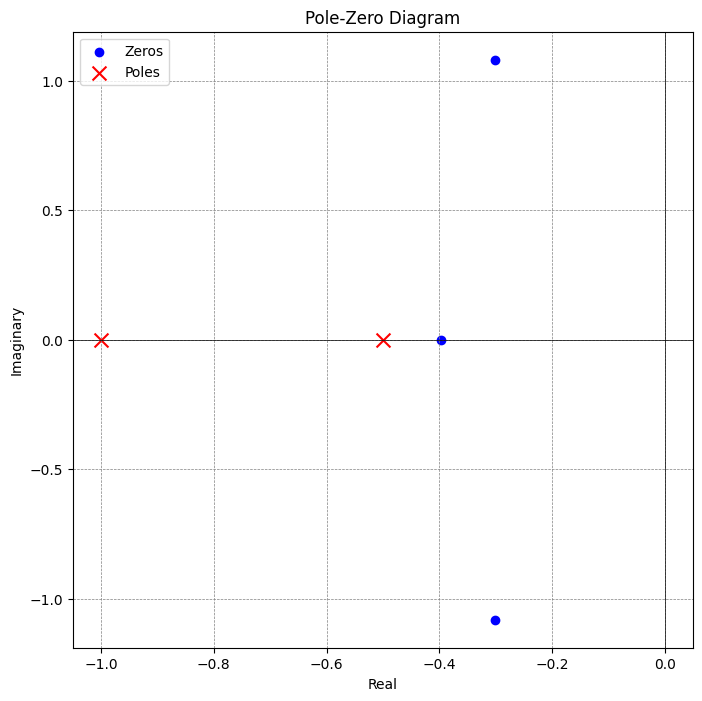

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk

# Coefficients of the numerator and denominator
numerator_coeffs = [1, 1, 3/2,1/2]
denominator_coeffs = [1,3/2,1/2]

# Get the zeros, poles, and gain
zeros, poles, gain = tf2zpk(numerator_coeffs, denominator_coeffs)

print(zeros)
print(poles)
# Plot the pole-zero diagram
plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles',s=100)
plt.title('Pole-Zero Diagram')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

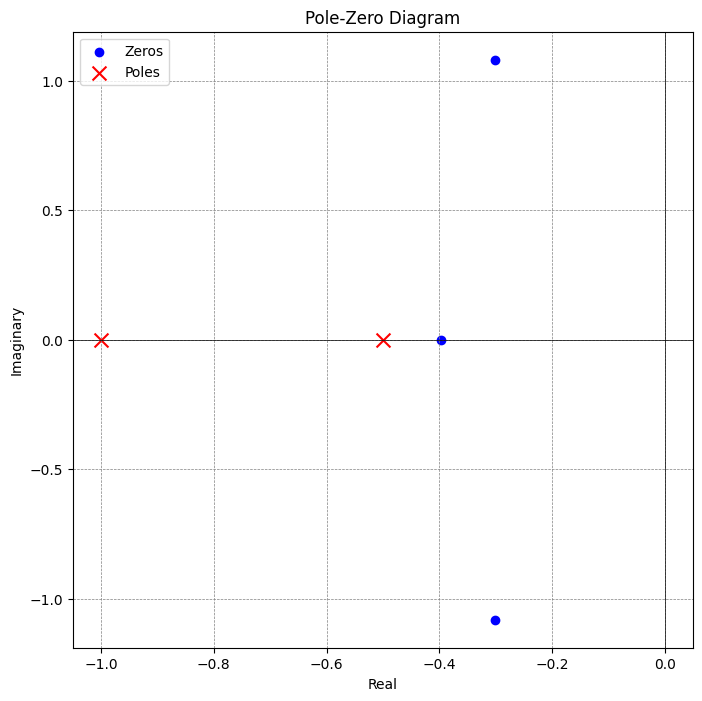

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk

# Coefficients of the numerator and denominator
numerator_coeffs = [1, 1, 1.5, 0.5]
denominator_coeffs = [1, 1.5, 0.5]

# Get the zeros, poles, and gain
zeros, poles, gain = tf2zpk(numerator_coeffs, denominator_coeffs)

# Plot the pole-zero diagram
plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles', s=100)  # Increased marker size for poles
plt.title('Pole-Zero Diagram')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


6. Determine the frequency response H (e^jω) of a system characterized by h(n) = (0.9) ^ n * u(n) Plot the magnitude, real part, imaginary part and phase responses.

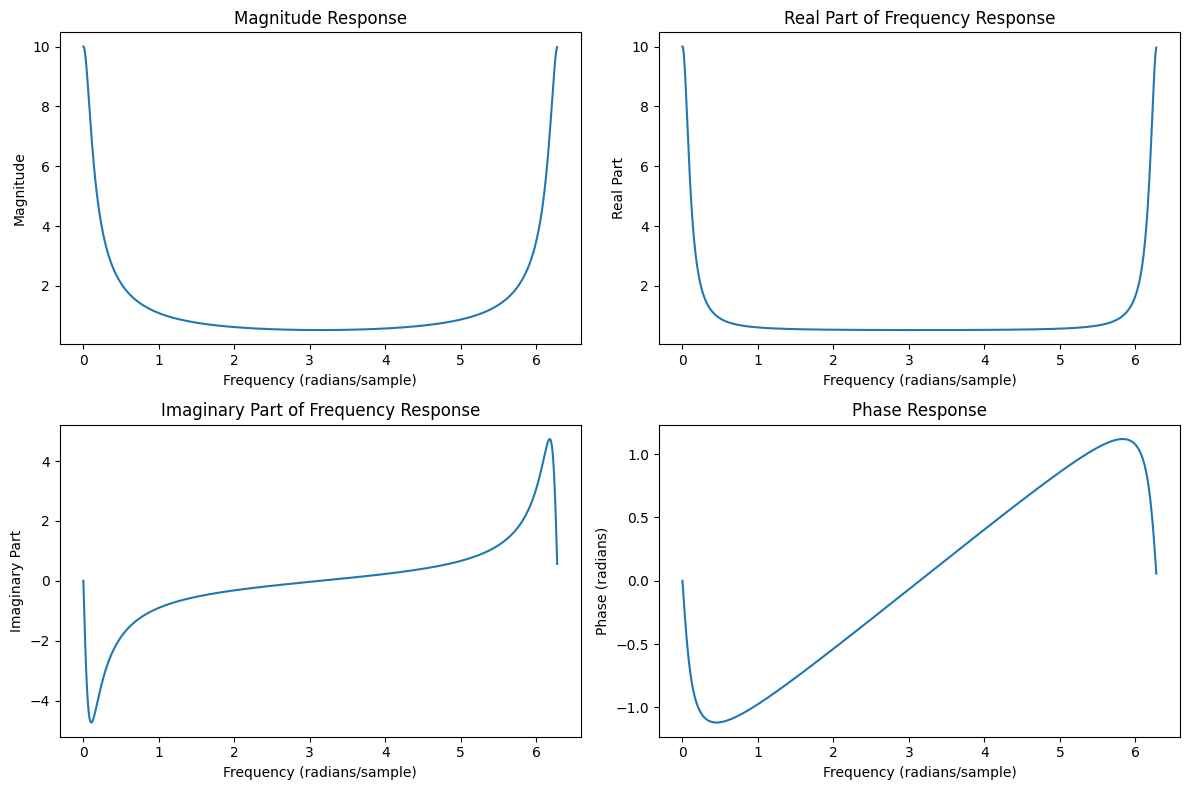

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# System characteristics
a = 0.9  # constant in the sequence

# Frequency range
omega = np.linspace(0, 2 * np.pi, 1000, endpoint=False)

# Frequency response calculation
H = np.sum((a**np.arange(0, 1000)) * np.exp(-1j * np.outer(omega, np.arange(0, 1000))), axis=1)

# Plot the magnitude response
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(omega, np.abs(H))
plt.title('Magnitude Response')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude')

# Plot the real part of the frequency response
plt.subplot(2, 2, 2)
plt.plot(omega, np.real(H))
plt.title('Real Part of Frequency Response')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Real Part')

# Plot the imaginary part of the frequency response
plt.subplot(2, 2, 3)
plt.plot(omega, np.imag(H))
plt.title('Imaginary Part of Frequency Response')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Imaginary Part')

# Plot the phase response
plt.subplot(2, 2, 4)
plt.plot(omega, np.angle(H))
plt.title('Phase Response')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


7. Use the MATLAB command "pzmap" to plot the poles and zeros and also "roots" command to determine the poles and zeros of the following systems of the following systems-

(a) H(s) = (s ^ 3 + 1)/(s ^ 4 + 2S ^ 2 + 1)

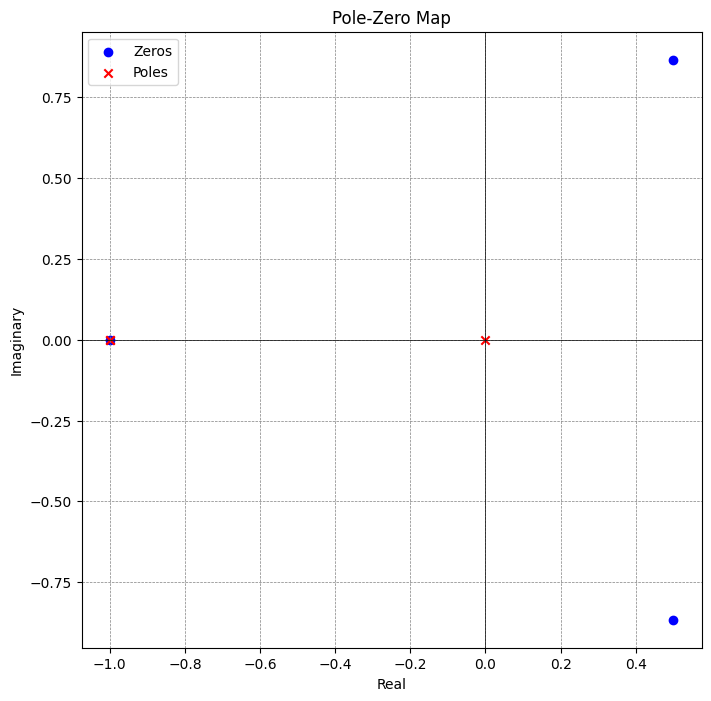

Zeros: [-1. +0.j         0.5+0.8660254j  0.5-0.8660254j]
Poles: [-1. -1.  0.]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# System transfer function coefficients
numerator = [1, 0, 0, 1]
denominator = [1, 2, 1, 0]

# Calculate poles and zeros
zeros = np.roots(numerator)
poles = np.roots(denominator)

# Plot poles and zeros using scatter
plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
plt.title('Pole-Zero Map')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Display poles and zeros
print('Zeros:', zeros)
print('Poles:', poles)


(b) H(s) = (4S ^ 2 + 8S + 10)/(2S ^ 3 + 8S ^ 2 + 18S + 20)

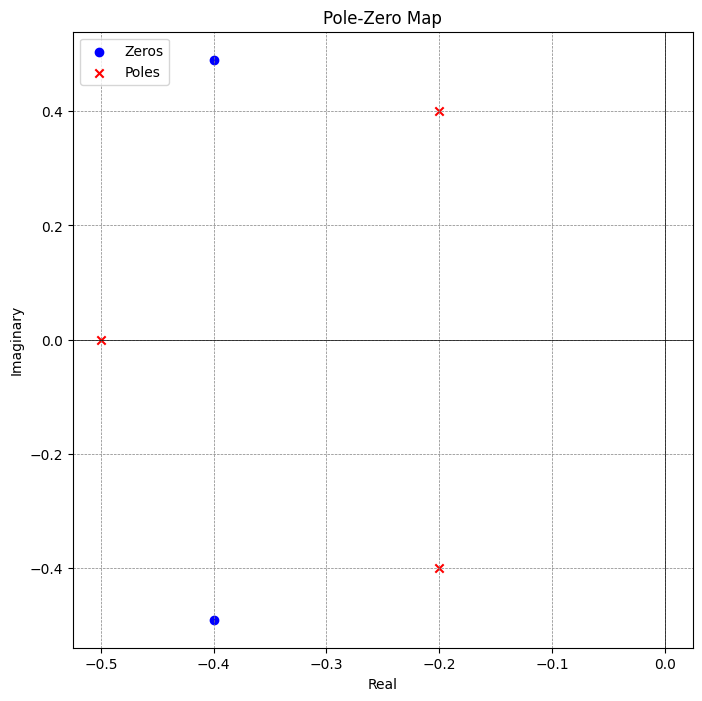

Zeros: [-0.4+0.48989795j -0.4-0.48989795j]
Poles: [-0.5+0.j  -0.2+0.4j -0.2-0.4j]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# System transfer function coefficients
numerator = [10,  8, 4]
denominator = [20, 18, 8, 2]

# Calculate poles and zeros
zeros = np.roots(numerator)
poles = np.roots(denominator)

# Plot poles and zeros using scatter
plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
plt.title('Pole-Zero Map')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Display poles and zeros
print('Zeros:', zeros)
print('Poles:', poles)


8. Design a bandpass filter of length M = 32 with passband edge frequencies f p1 =0.2 and f p2 = 0.35 and stopband edge frequencies fs1 = 0.1 and fs2 = 0.425

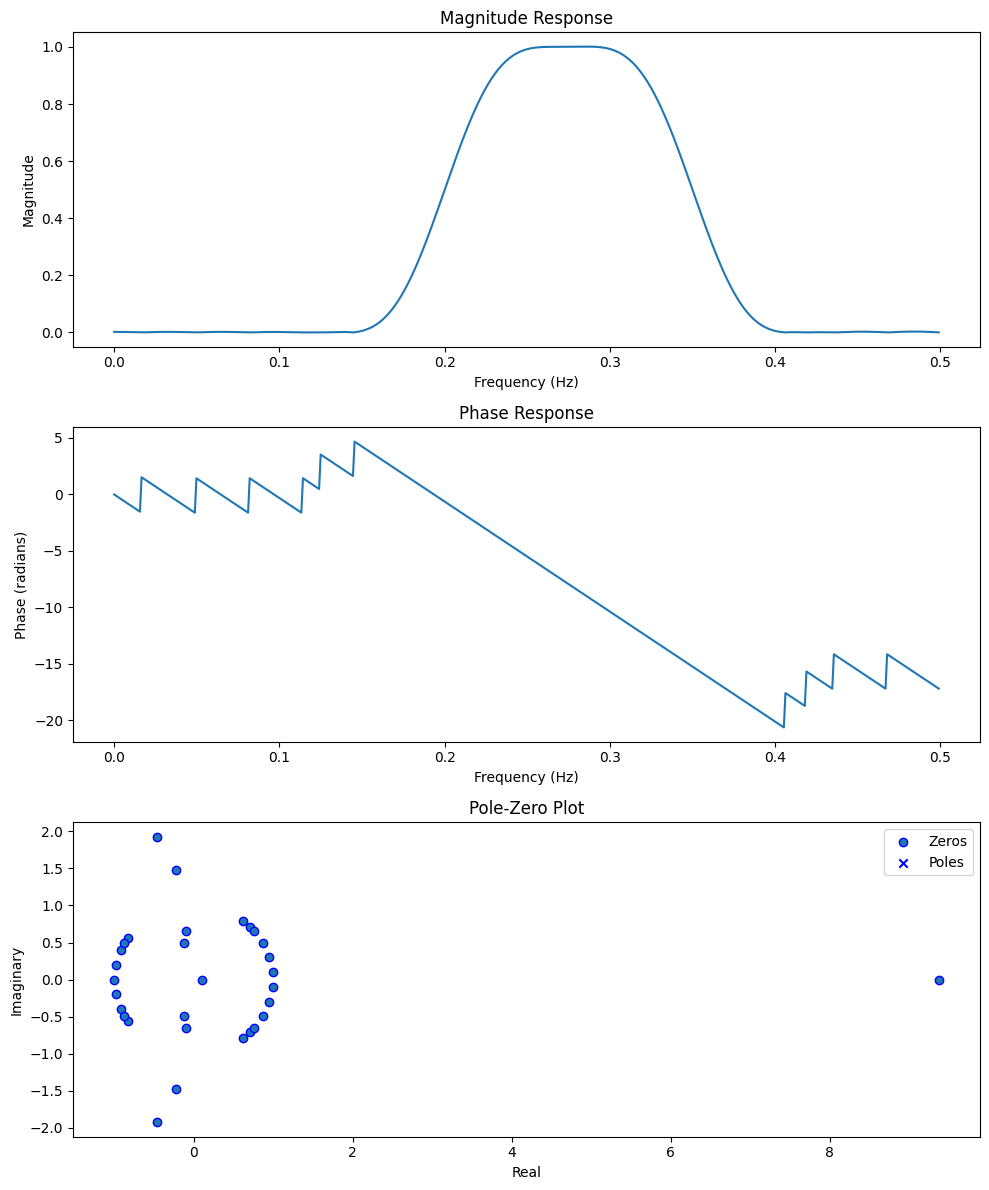

In [19]:
#fir
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Filter specifications
M = 32  # Filter length
fs = 1.0  # Sampling frequency

# Passband edge frequencies
fp1 = 0.2
fp2 = 0.35

# Stopband edge frequencies
fs1 = 0.1
fs2 = 0.425

# Calculate filter parameters
nyquist = 0.5 * fs
passband_edges = [fp1, fp2]
stopband_edges = [fs1, fs2]

# Design the filter using the specified parameters
# Using passband_edges and stopband_edges to define the bandpass filter
b = sig.firwin(M, [fp1, fp2], fs=fs, window='hamming', pass_zero=False)

# Frequency response
w, h_freq = sig.freqz(b, fs=fs)

# Poles and Zeros
z, p, k = sig.tf2zpk(b, 1)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.legend()
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')

plt.tight_layout()
plt.show()


Design a bandpass filter of length M = 32 with passband edge frequencies f p1 =0.2 and f p2 = 0.35 and stopband edge frequencies fs1 = 0.1 and fs2 = 0.425

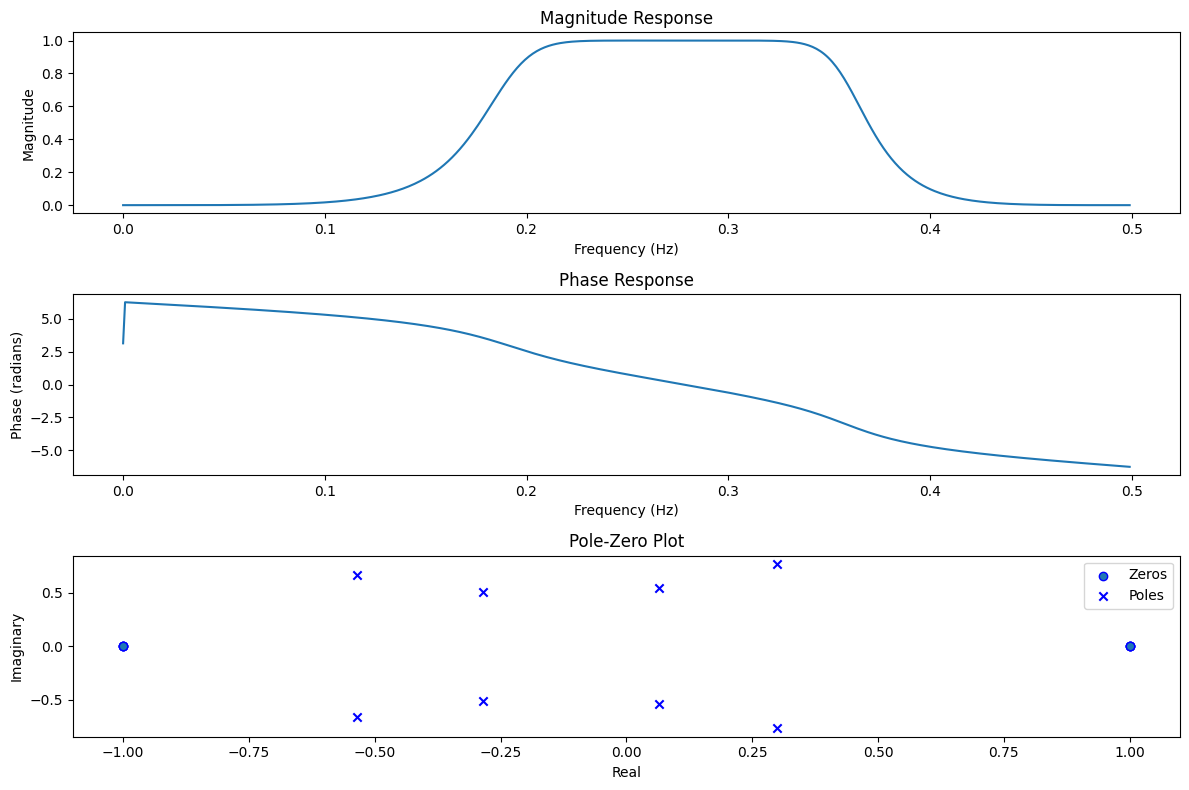

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Sampling frequency
fs = 1

# Define passband and stopband edge frequencies
fp1 = 0.2
fp2 = 0.35
fs1 = 0.1
fs2 = 0.425

# Determine the filter order and cutoff frequencies
passband_edges = [fp1 / (fs/2), fp2 / (fs/2)]
stopband_edges = [fs1 / (fs/2), fs2 / (fs/2)]

# Calculate filter order and critical frequencies
[n, w] = sig.buttord(passband_edges, stopband_edges, 1,32)

# Design the bandpass filter
[b, a] = sig.butter(n, w, btype='bandpass')

# Frequency response
w, h = sig.freqz(b, a, 512, fs=fs)
z, p, k = sig.tf2zpk(b, a)

# Plotting
plt.figure(figsize=(12, 8))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.legend()
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')

plt.tight_layout()
plt.show()


9. Design a lowpass filter of length M = 61 with a passband edge frequency fp = 0.1 and a stopband edge frequency fs = 0.15

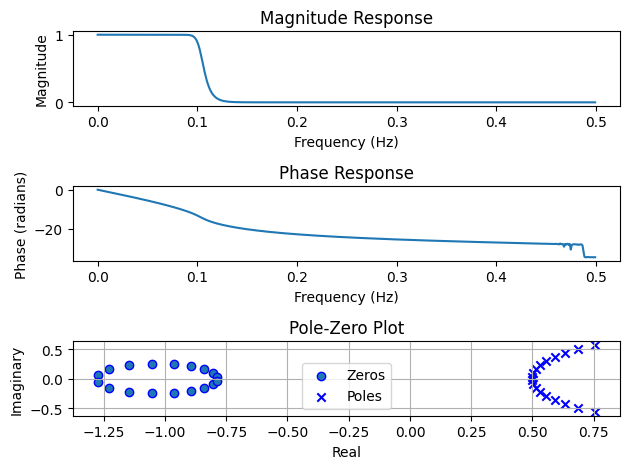

In [42]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
M = 61  # Filter length
fp = 0.1  # Passband edge frequency
fstop = 0.15  # Stopband edge frequency
fs = 1
n, w = sig.buttord(fp/(fs/2), fstop/(fs/2), 1, M)
b, a = sig.butter(n, w, btype='lowpass')
w, h = sig.freqz(b,a, 512, fs=fs)
z, p, k = sig.tf2zpk(b, a)

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


10.Creating a signals 's' with three sinusoidal components (at 5,15,30 Hz) and a time vector 't' of 100 samples with a sampling rate of 100 Hz, and displaying it in the time domain. Design an IIR filter to suppress frequencies of 5 Hz and 30 Hz from given signal

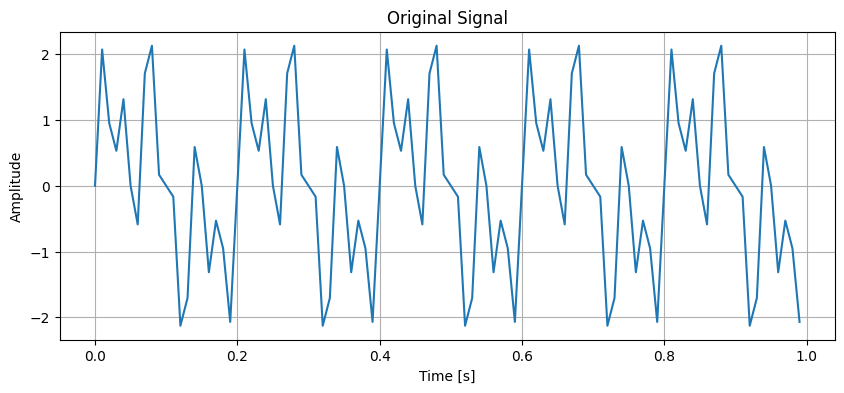

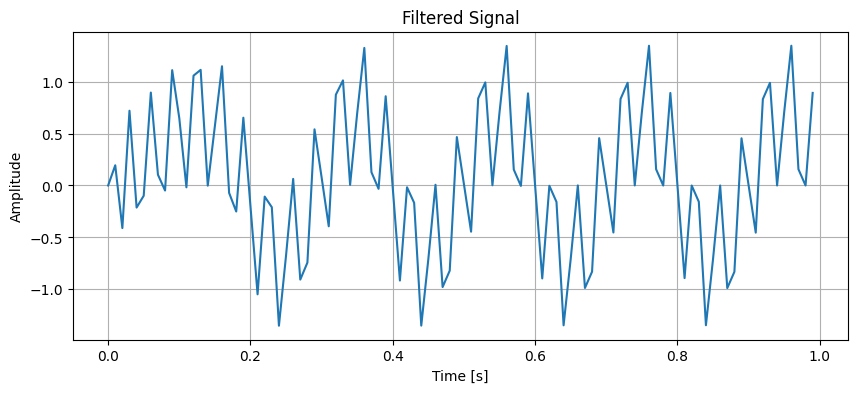

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Step 1: Create the signal
fs = 100  # Sampling rate
t = np.arange(0, 1, 1/fs)  # Time vector
s = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t, s)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Step 2: Design an IIR filter
# Design an IIR filter to suppress frequencies of 5 Hz and 30 Hz
frequencies_to_suppress = [5, 30]  # Frequencies to suppress in Hz
nyquist = 0.5 * fs
cutoff_normalized = [f / nyquist for f in frequencies_to_suppress]

b, a = signal.butter(N=4, Wn=cutoff_normalized, btype='bandstop', analog=False)

# Step 3: Apply the IIR filter to suppress frequencies of 5 Hz and 30 Hz
filtered_signal = signal.lfilter(b, a, s)
# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
